<a href="https://colab.research.google.com/github/markcastorm/DeepLearning-face-detection-Model/blob/main/Deep_learning_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup and Get Data

Installing Dependancies and Setup

In [ ]:
!pip install labelme tensorflow opencv-python matplotlib albumentations
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.4.1-py3-none-any.whl size=1436184 sha256=3709e5ebb56b70de48eac6d87d796cde5d1ae2329e7a7d709b24c1458e54e66d
  Stored in directory: /root/.cache/pip/whee

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!virtualenv /content/drive/MyDrive/facedet_env

created virtual environment CPython3.10.12.final.0-64 in 35842ms
  creator CPython3Posix(dest=/content/drive/MyDrive/facedet_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: Markdown==3.5.1, MarkupSafe==2.1.3, PyQt5==5.15.10, PyQt5_Qt5==5.15.2, PyQt5_sip==12.13.0, PySocks==1.7.1, PyYAML==6.0.1, QtPy==2.4.1, absl_py==2.0.0, albumentations==1.3.1, asttokens==2.4.1, astunparse==1.6.3, beautifulsoup4==4.12.2, cachetools==5.3.2, certifi==2023.11.17, charset_normalizer==3.3.2, coloredlogs==15.0.1, comm==0.2.1, contourpy==1.2.0, cycler==0.12.1, debugpy==1.8.0, decorator==5.1.1, exceptiongroup==1.2.0, executing==2.0.1, filelock==3.13.1, flatbuffers==23.5.26, fonttools==4.47.0, gast==0.5.4, gdown==4.7.1, google_auth==2.26.1, google_auth_oauthlib==1.2.0, google_pasta==0.2.0, grpcio==1.60.0, h5py==3.10.0, humanfriendly==10.0, idna==3.

In [ ]:
!source /content/drive/MyDrive/facedet_env/bin/activate; pip install ipykernel labelme tensorflow opencv-python matplotlib albumentations

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/facedet_env/lib/python3.8/site-packages")

Collecting Images using OpenCV

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'

# Create a 'data' folder
data_folder = os.path.join(root_path, 'data')
os.makedirs(data_folder, exist_ok=True)

# Create an 'images' subfolder inside the 'data' folder
images_folder = os.path.join(data_folder, 'images')
os.makedirs(images_folder, exist_ok=True)

# Set IMAGES_PATH to 'data/images'
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30
# Print the path to the 'data/images' folder
print("Path to 'data/images' folder:", IMAGES_PATH)

# Create a 'labels' subfolder inside the 'data' folder
labels_folder = os.path.join(data_folder, 'labels')
os.makedirs(labels_folder, exist_ok=True)

# Set LABELS_PATH to 'data/labels'
LABELS_PATH = labels_folder

# Print the path to the 'data/labels' folder
print("Path to 'data/labels' folder:", LABELS_PATH)
print("Path to 'data/images' folder:", IMAGES_PATH)

Path to 'data/images' folder: data/images
Path to 'data/labels' folder: /content/drive/MyDrive/facedet_env/data/labels
Path to 'data/images' folder: data/images


In [ ]:
number_images = 30

Lets create a function to take the images

In [ ]:
import google
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import os
import time
import uuid
import base64

# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'

# Set IMAGES_PATH to 'data/images'
IMAGES_PATH = os.path.join(root_path, 'data', 'images')

# Create the 'data/images' folder if it doesn't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

# Access the camera using Colab's interface
def take_photos(number_images=30, filename_prefix='photo'):
    for imgnum in range(number_images):
        print('Collecting image {}'.format(imgnum))

        # Capture image using Colab's interface
        image_data = eval_js('takePhoto({})'.format(0.8))

        # Decode and save the image
        imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
        with open(imgname, 'wb') as f:
            f.write(base64.b64decode(image_data.split(',')[1]))

        # Display the captured image
        display(Image(filename=imgname))
        time.sleep(1.0)

# JavaScript code to capture an image
js_code = '''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        const context = canvas.getContext('2d');

        // Capture the image from the video stream
        context.drawImage(video, 0, 0, canvas.width, canvas.height);

        // Convert the captured image to a data URL
        const imageData = canvas.toDataURL('image/jpeg', quality);

        // Clean up
        stream.getVideoTracks()[0].stop();
        div.remove();

        return imageData;
    }
'''

# Execute the JavaScript code in the notebook
display(Javascript(js_code))

# Call the Python function to capture images
take_photos(number_images=30, filename_prefix='photo')


<IPython.core.display.Javascript object>

MessageError: NotAllowedError: The request is not allowed by the user agent or the platform in the current context.

Image function for conda environment


In [ ]:
# cap = cv2.VideoCapture(0)
# for imgnum in range (number_images):
#   print('Collecting image {}'.format(imgnum))
#   ret, frame = cap.read()
#   imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#   cv2.imwrite(imgname, frame)
#   cv2.imshow('frame', frame)
#   time.sleep(0.5)

#   if cv2.waitKey(1) & 0xFF == ord('q'):
#     break
# cap.release()
# cv2.destroyAllWindows()

##Annotate the images with Labelme library

In [ ]:
# Install X11 forwarding
!apt-get install -y x11-apps

# Install labelme
!pip install labelme

# Start X11 server
import os
os.system('X11Forwarding yes')

# Run labelme
!labelme



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxkbfile1 xbitmaps
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxkbfile1 x11-apps xbitmaps
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 814 kB of archives.
After this operation, 2,940 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-apps amd64 7.7+8build2 [719 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 xbitmaps all 1.1.1-2.1ubuntu1 [23.4 kB]
Fetched 814 kB in 0s (2,380 kB/s)
Selecting previously unselected package libxkbfile1:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 

##Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

  Navigate to Edit→Notebook Settings
  select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#Reviewing our dataset and building an Image Loading Function

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

Limmiting the GPU Memory Growth

In [ ]:
#Helps Avoid OOOM errors by setting GPU M emory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental. set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Loading Image into TF Data Pipeline

In [ ]:
 #images = tf.data.Dataset.files('data\\train\\images\\*.jpg')

In [ ]:
import os

# Check if the folder exists
if not os.path.exists(images_folder):
    raise ValueError("Image folder does not exist.")

# Check if there are any JPG files in the folder
if len(os.listdir(images_folder)) == 0:
    raise ValueError("No JPG images found in the folder.")

In [ ]:
from tensorflow.data import Dataset
# Use the list_files method
images_folder = "/content/drive/MyDrive/facedet_env/data/images"

# Use the list_files method to create the dataset.
images = Dataset.list_files(images_folder + '/*.jpg', shuffle=False)


In [ ]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/facedet_env/data/images/0738101d-ef22-11ee-9168-b4b676f704f3.jpg'

In [ ]:
def load_image(X):
  byte_img = tf.io.read_file(X)
  img = tf.io.decode_jpeg(byte_img)
  return img

In [ ]:
images = images.map(load_image)


array([[[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       ...,

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]]], dtype=uint8)
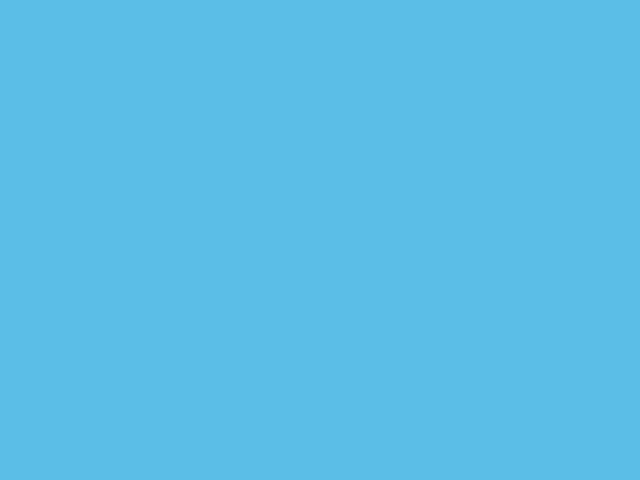

In [ ]:
images.as_numpy_iterator().next()

Lets confirm if they are in the tensrflow data pipieline

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

Now Lets visualize the Raw images using Matplotlib

In [ ]:
image_generator = images.batch(5).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

<function matplotlib.pyplot.show(close=None, block=None)>

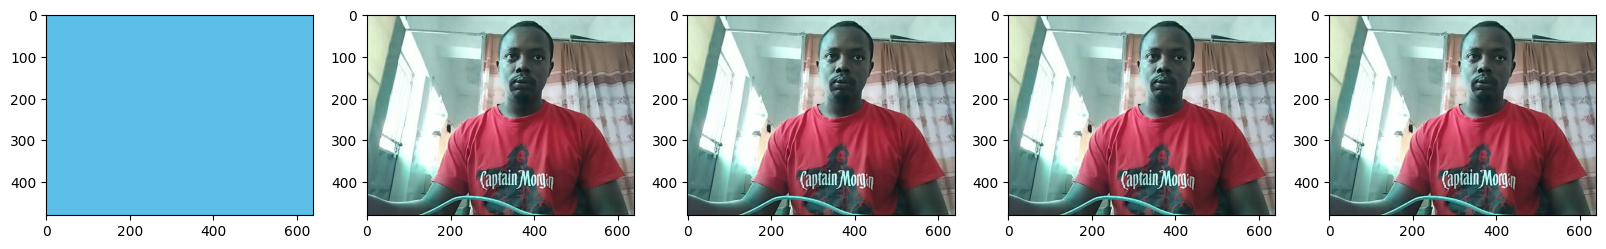

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, image in enumerate(plot_images):
  ax[idx].imshow(image)
plt.show

#Partitioning UNaugmented Data

Manually spliting Data into train test and VAL

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'

# Create a 'data' folder
data_folder = os.path.join(root_path, 'data')
os.makedirs(data_folder, exist_ok=True)

# Create an 'images' subfolder inside the 'data' folder
images_folder = os.path.join(data_folder, 'images')
os.makedirs(images_folder, exist_ok=True)

# Set IMAGES_PATH to 'data/images'
IMAGES_PATH = images_folder

# Print the path to the 'data/images' folder
print("Path to 'data/images' folder:", IMAGES_PATH)

# Create a 'labels' subfolder inside the 'data' folder
labels_folder = os.path.join(data_folder, 'labels')
os.makedirs(labels_folder, exist_ok=True)

# Set LABELS_PATH to 'data/labels'
LABELS_PATH = labels_folder

# Print the path to the 'data/labels' folder
print("Path to 'data/labels' folder:", LABELS_PATH)



Path to 'data/images' folder: /content/drive/MyDrive/facedet_env/data/images
Path to 'data/labels' folder: /content/drive/MyDrive/facedet_env/data/labels


In [ ]:


# Create a 'train' folder
train_folder = os.path.join(data_folder, 'train')
os.makedirs(train_folder, exist_ok=True)
print("Path to 'data/train' folder:", train_folder)

# Create a 'images' folder inside train folder
images_trfolder = os.path.join(train_folder, 'images')
os.makedirs(images_trfolder, exist_ok=True)
print("Path to 'data/train' folder:", images_trfolder)
# Create a 'data' folder inside train folder
labels_trfolder = os.path.join(train_folder, 'labels')
os.makedirs(labels_trfolder, exist_ok=True)
print("Path to 'data/train' folder:", labels_trfolder)
# Create an 'test' subfolder inside the 'data' folder
test_folder = os.path.join(data_folder, 'test')
os.makedirs(test_folder, exist_ok=True)
print("Path to 'data/train' folder:", test_folder)
# Create a 'images' folder inside test folder
images_tesfolder = os.path.join(test_folder, 'images')
os.makedirs(images_tesfolder, exist_ok=True)
print("Path to 'data/train' folder:", images_tesfolder)
# Create a 'data' folder inside test folder
labels_tesfolder = os.path.join(test_folder, 'labels')
os.makedirs(labels_tesfolder, exist_ok=True)
print("Path to 'data/train' folder:", labels_tesfolder)
# Create an 'val' subfolder inside the 'data' folder
val_folder = os.path.join(data_folder, 'val')
os.makedirs(val_folder, exist_ok=True)
print("Path to 'data/train' folder:", val_folder)
# Create a 'images' folder inside val folder
images_valfolder = os.path.join(val_folder, 'images')
os.makedirs(images_valfolder, exist_ok=True)
print("Path to 'data/train' folder:", images_valfolder)
# Create a 'data' folder inside val folder
labels_valfolder = os.path.join(val_folder, 'labels')
os.makedirs(labels_valfolder, exist_ok=True)
print("Path to 'data/train' folder:", labels_valfolder)
# Setting the paths
train = train_folder
test = test_folder
val = val_folder
data = data_folder

Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/train
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/train/images
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/train/labels
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/test
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/test/images
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/test/labels
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/val
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/val/images
Path to 'data/train' folder: /content/drive/MyDrive/facedet_env/data/val/labels


In [ ]:

# Get a list of all image files in the 'images' folder
images = os.listdir(IMAGES_PATH)

# Split the images into training and testing sets (70% train, 30% test)
train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)

# Split the testing set into validation and testing sets (50% each)
val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

# Move the training images to the 'train/images' folder
for image in train_images:
    src_path = os.path.join(IMAGES_PATH, image)
    dst_path = os.path.join(images_trfolder, image)
    os.rename(src_path, dst_path)

# Move the validation images to the 'val/images' folder
for image in val_images:
    src_path = os.path.join(IMAGES_PATH, image)
    dst_path = os.path.join(images_valfolder, image)
    os.rename(src_path, dst_path)

# Move the testing images to the 'test/images' folder
for image in test_images:
    src_path = os.path.join(IMAGES_PATH, image)
    dst_path = os.path.join(images_tesfolder, image)
    os.rename(src_path, dst_path)


Reverse

In [ ]:
import shutil
# Function to move images from destination folder back to the original images folder
def move_images_back(destination_folder):
    for root, _, files in os.walk(destination_folder):
        for file in files:
            src_path = os.path.join(root, file)
            dst_path = os.path.join(IMAGES_PATH, file)
            shutil.move(src_path, dst_path)

# Move the training images back to the 'images' folder
move_images_back(os.path.join(train, 'images'))

# Move the validation images back to the 'images' folder
move_images_back(os.path.join(val, 'images'))

# Move the testing images back to the 'images' folder
move_images_back(os.path.join(test, 'images'))

Move the Matching Labels

This code will It iterates through the folders 'train', 'test', and 'val' in the 'data' folder. For each folder, it iterates through the files in the 'images' subfolder. For each file, it constructs the corresponding JSON file name and checks if it exists in the 'data/labels' folder. If it does, it moves the file to the 'labels' subfolder of the current folder.

In [ ]:
import os

for folder in ['train', 'test', 'val']:
    print(f"Processing folder: {folder}")
    # Iterate through the files in the 'images' subfolder of each folder
    images_folder = os.path.join(data_folder, folder, 'images')
    for file in os.listdir(images_folder):
        print(f"Checking file: {file}")
        # Construct the corresponding JSON file name
        filename, ext = os.path.splitext(file)
        json_filename = filename + '.json'

        # Check if the JSON file exists in the 'data/labels' folder
        existing_json_path = os.path.join(labels_folder, json_filename)
        if os.path.exists(existing_json_path):
            print(f"Found corresponding JSON file: {json_filename}")
            # Move the file to the 'labels' subfolder of the current folder
            current_image_path = os.path.join(images_folder, file)
            target_labels_folder = os.path.join(data_folder, folder, 'labels')
            new_json_path = os.path.join(target_labels_folder, json_filename)
            os.replace(existing_json_path, new_json_path)
            print(f"Moved file: {current_image_path} to {new_json_path}")
        else:
            print(f"No corresponding JSON file found for {file}")

Processing folder: train
Checking file: 909199a0-edd6-11ee-9ae2-4e260e08bd00.jpg
No corresponding JSON file found for 909199a0-edd6-11ee-9ae2-4e260e08bd00.jpg
Checking file: 903a765e-edd6-11ee-b727-4e260e08bd00.jpg
No corresponding JSON file found for 903a765e-edd6-11ee-b727-4e260e08bd00.jpg
Checking file: 90e1384f-edd6-11ee-9931-4e260e08bd00.jpg
No corresponding JSON file found for 90e1384f-edd6-11ee-9931-4e260e08bd00.jpg
Checking file: 921b770c-edd6-11ee-992c-4e260e08bd00.jpg
No corresponding JSON file found for 921b770c-edd6-11ee-992c-4e260e08bd00.jpg
Checking file: 9306ed4b-edd6-11ee-82b3-4e260e08bd00.jpg
No corresponding JSON file found for 9306ed4b-edd6-11ee-82b3-4e260e08bd00.jpg
Checking file: 93a42e4e-edd6-11ee-807c-4e260e08bd00.jpg
No corresponding JSON file found for 93a42e4e-edd6-11ee-807c-4e260e08bd00.jpg
Checking file: 93f2de3d-edd6-11ee-bf8f-4e260e08bd00.jpg
No corresponding JSON file found for 93f2de3d-edd6-11ee-bf8f-4e260e08bd00.jpg
Checking file: 948f808e-edd6-11ee-a24

Reverse of moving labels

In [ ]:
import os

for folder in ['train', 'test', 'val']:
    print(f"Processing folder: {folder}")
    # Iterate through the files in the 'labels' subfolder of each folder
    labels_folder = os.path.join(data_folder, folder, 'labels')
    for file in os.listdir(labels_folder):
        if file.endswith('.json'):
            print(f"Checking file: {file}")
            # Construct the corresponding image file name
            filename, ext = os.path.splitext(file)
            image_filename = filename + '.jpg'

            # Check if the image file exists in the 'data/images' folder
            existing_image_path = os.path.join(images_folder, image_filename)
            if os.path.exists(existing_image_path):
                print(f"Found corresponding image file: {image_filename}")
                # Move the file to the 'images' subfolder of the current folder
                current_json_path = os.path.join(labels_folder, file)
                target_images_folder = os.path.join(data_folder, folder, 'images')
                new_image_path = os.path.join(target_images_folder, image_filename)
                os.replace(current_json_path, new_image_path)
                print(f"Moved file: {current_json_path} to {new_image_path}")
            else:
                print(f"No corresponding image file found for {file}")


## Applying Augmentation on Images and Labels using Albumentations

Setting up Albumentations Transform Pipeline

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450 ),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

Loading a Test Image and Annotation with OpenCV and JSON

In [ ]:
img = cv2.imread(os.path.join(data_folder ,'train', 'images', 'f776561a-ef21-11ee-b287-b4b676f704f3.jpg' ))

In [ ]:
# from IPython.display import Image, display
# import cv2
# import os

# # Specify the root path for your project
# root_path = '/content/drive/MyDrive/facedet_env/'

# # Create a 'data' folder
# data_folder = os.path.join(root_path, 'data')

# # Read an image using OpenCV
# img_path = os.path.join(data_folder, 'train', 'images', '0eb53a3c-ef22-11ee-afbe-b4b676f704f3.jpg')
# img = cv2.imread(img_path)

# # Check if the image is successfully loaded
# if img is not None:
#     # Display the image using IPython's Image class
#     display(Image(data=img, format='jpg'))
# else:
#     print(f"Failed to load image: {img_path}")

array([[[229, 245, 234],
        [230, 246, 235],
        [230, 246, 235],
        ...,
        [213, 214, 188],
        [213, 214, 188],
        [213, 214, 188]],

       [[229, 245, 234],
        [230, 246, 235],
        [230, 246, 235],
        ...,
        [213, 214, 188],
        [213, 214, 188],
        [213, 214, 188]],

       [[229, 245, 234],
        [230, 246, 235],
        [230, 246, 235],
        ...,
        [213, 214, 188],
        [213, 214, 188],
        [213, 214, 188]],

       ...,

       [[ 68,  66,  65],
        [ 68,  66,  65],
        [ 68,  66,  65],
        ...,
        [ 61,  67,  44],
        [ 61,  67,  44],
        [ 65,  71,  48]],

       [[ 68,  66,  65],
        [ 68,  66,  65],
        [ 68,  66,  65],
        ...,
        [ 57,  62,  41],
        [ 59,  64,  43],
        [ 65,  70,  49]],

       [[ 68,  66,  65],
        [ 68,  66,  65],
        [ 68,  66,  65],
        ...,
        [ 54,  59,  38],
        [ 57,  62,  41],
        [ 64,  69,  48]]], dtype=uint8)
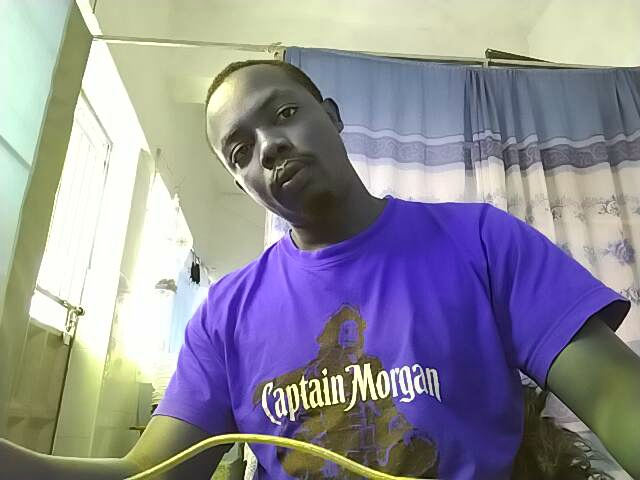

In [ ]:
img

In [ ]:
label_path = os.path.join(data_folder, 'train', 'labels', 'f776561a-ef21-11ee-b287-b4b676f704f3.json')
print(label_path)

/content/drive/MyDrive/facedet_env/data/train/labels/f776561a-ef21-11ee-b287-b4b676f704f3.json


In [ ]:
# Open a JSON file in read mode
json_path = os.path.join(data_folder, 'train', 'labels', 'f776561a-ef21-11ee-b287-b4b676f704f3.json')
with open(json_path, 'r') as f:
    label = json.load(f)

In [ ]:
label['shapes'][0]['points']

[[202.32323232323236, 60.707070707070706],
 [349.29292929292933, 226.86868686868686]]

Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[202.32323232323236,
 60.707070707070706,
 349.29292929292933,
 226.86868686868686]

In [ ]:
coords = list(np.divide(coords, [640,480, 640, 480]))

In [ ]:
coords

[0.31613005050505055,
 0.12647306397306396,
 0.5457702020202021,
 0.47264309764309764]

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [ ]:
augmented['bboxes']

[(0.18960718294051634,
  0.132682379349046,
  0.5162065095398429,
  0.5019304152637486)]

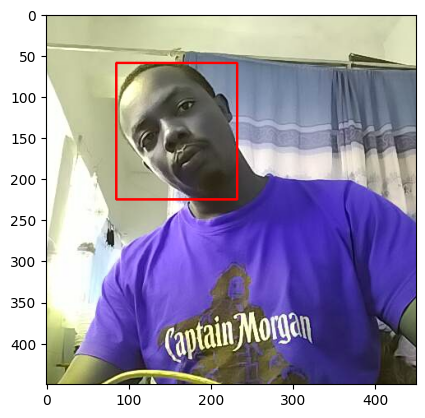

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
              (255,0,0),2
              )
plt.imshow(augmented['image'])

since our test on one image is complete lets go ahead and run on the rest of the images

##Build and RunAugmentation Pipeline

####Run Augmentation pipeline

In [ ]:
import os
import json
import cv2
import numpy as np

# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'

# Create a 'data' folder
data_folder = os.path.join(root_path, 'data')

# Create a 'aug_data' folder in the root path
aug_data_folder = os.path.join(root_path, 'aug_data')
os.makedirs(aug_data_folder, exist_ok=True)

# First, let's loop through our training and validation folders
for partition in ['train', 'test', 'val']:
    # Then, we grab the images inside this folder
    for image in os.listdir(os.path.join(root_path, 'data', partition, 'images')):
        img = cv2.imread(os.path.join(root_path, 'data', partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(root_path, 'data', partition, 'labels', f'{image.split(".")[0]}.json')

        # Check if an annotation exists for that image and assign a zero set of coordinates for it
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            # Make sure the label structure is as expected before accessing points
            if 'shapes' in label and label['shapes']:
                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]

                coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(root_path, 'aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'),
                            augmented['image'])

                annotation = {'image': image}

                if os.path.exists(label_path) and len(augmented['bboxes']) > 0:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(
                        os.path.join(root_path, 'aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'),
                        'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


In [ ]:
import os
import json
import cv2
import numpy as np

# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'

# First, let's loop through our training and validation folders
for partition in ['train', 'test', 'val']:
    # Then, we grab the images inside this folder
    for image in os.listdir(os.path.join(root_path, 'data', partition, 'images')):
        img = cv2.imread(os.path.join(root_path, 'data', partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(root_path, 'data', partition, 'labels', f'{image.split(".")[0]}.json')

        # Check if an annotation exists for that image and assign a zero set of coordinates for it
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            # Make sure the label structure is as expected before accessing points
            if 'shapes' in label and label['shapes']:
                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]

                coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(root_path, 'aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'),
                            augmented['image'])

                annotation = {'image': image}

                if os.path.exists(label_path) and len(augmented['bboxes']) > 0:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(
                        os.path.join(root_path, 'aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'),
                        'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


Load Augmented Images to TensorFlow Dataset

In [ ]:
# train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
# train_images = train_images.map(load_image)
# train_images = train_images.map(lambda x: tf.image.resize(x,(120,120)))
# train_images = train_images.map(lambda x: x/255)


In [ ]:
# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'
aug_data_folder = os.path.join(root_path, 'aug_data')

# Create a list of file paths for the augmented images
train_image_paths = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'train', 'images', '*.jpg'), shuffle=False)

# Load and preprocess images
train_images = train_image_paths.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x / 255.0)

In [ ]:
# Create a list of file paths for the augmented images
test_image_paths = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'test','images', '*.jpg'), shuffle=False)

# Load and preprocess images
test_images = test_image_paths.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x / 255.0)

In [ ]:
# Create a list of file paths for the augmented images
val_image_paths = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'val','images', '*.jpg'), shuffle=False)

# Load and preprocess images
val_images = val_image_paths.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x / 255.0)

This is a function to tackle the tidious loading code above

In [ ]:
import os
import tensorflow as tf

def load_and_preprocess_images(partition, image_size=(120, 120)):
    # Specify the root path for your project
    root_path = '/content/drive/MyDrive/facedet_env/'
    aug_data_folder = os.path.join(root_path, 'aug_data')

    # Create a list of file paths for the augmented images
    image_paths = tf.data.Dataset.list_files(os.path.join(aug_data_folder, partition, 'images', '*.jpg'), shuffle=False)

    # Load and preprocess images
    images = image_paths.map(load_image)
    images = images.map(lambda x: tf.image.resize(x, image_size))
    images = images.map(lambda x: x / 255.0)

    return images



# Load and preprocess training images
train_images = load_and_preprocess_images('train')

# Load and preprocess test images
test_images = load_and_preprocess_images('test')

# Load and preprocess validation images
val_images = load_and_preprocess_images('val')


In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        ...,
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236]],

       [[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        ...,
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236]],

       [[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        ...,
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236]],

       ...,

       [[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0

#Prepare Labels

Build a Label loading function

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
    label = json.load(f)

  return[label['class']], label['bbox']


Load Labels to Tensorflow Dataset

In [ ]:
# Specify the root path for your project
root_path = '/content/drive/MyDrive/facedet_env/'
aug_data_folder = os.path.join(root_path, 'aug_data')

train_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'train', 'labels', '*.json'), shuffle=False)
train_labels = train_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

In [ ]:
train_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'train', 'labels', '*.json'), shuffle=False)
train_labels = train_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'test', 'labels', '*.json'), shuffle=False)
test_labels = test_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'val', 'labels', '*.json'), shuffle=False)
val_labels = val_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

##Combine Label and image Samples

Check Partition Lengths

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(13260, 13260, 2880, 2880, 5160, 5160)

Creating Final Datasets(images & Labels)

In [ ]:
# Define a function to load labels from JSON files
def load_labels(label_path):
    try:
        with open(label_path.numpy(), 'r', encoding="utf-8") as f:
            label_data = json.load(f)

        # Check if the label data is empty or not in the expected format
        if not label_data:
            print(f"Empty label file: {label_path.numpy()}")
            return tf.zeros((1,), dtype=tf.uint8), tf.zeros((4,), dtype=tf.float16)

        # Extract image filename, bounding box, and class label from the loaded JSON data
        image_filename = label_data.get("image", "")
        bbox = label_data.get("bbox", [])
        class_label = label_data.get("class", 0)

        # Check if any of the required fields are missing or invalid
        if not image_filename or not bbox or not class_label:
            print(f"Invalid label file: {label_path.numpy()}")
            return tf.zeros((1,), dtype=tf.uint8), tf.zeros((4,), dtype=tf.float16)

        # Convert class label to uint8 and bounding box to float16
        class_label = tf.convert_to_tensor(class_label, dtype=tf.uint8)
        bbox = tf.convert_to_tensor(bbox, dtype=tf.float16)

        return class_label, bbox
    except Exception as e:
        print(f"Error loading labels from {label_path.numpy()}: {e}")
        return tf.zeros((1,), dtype=tf.uint8), tf.zeros((4,), dtype=tf.float16)

In [ ]:


# # Specify the root path for your project
# root_path = '/content/drive/MyDrive/facedet_env/'
# aug_data_folder = os.path.join(root_path, 'aug_data')

# # Load and preprocess training labels
# train_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'train', 'labels', '*.json'), shuffle=False)
# train_labels = train_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

# # Load and preprocess test labels
# test_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'test', 'labels', '*.json'), shuffle=False)
# test_labels = test_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

# # Load and preprocess validation labels
# val_labels = tf.data.Dataset.list_files(os.path.join(aug_data_folder, 'val', 'labels', '*.json'), shuffle=False)
# val_labels = val_labels.map(lambda X: tf.py_function(load_labels, [X], [tf.uint8, tf.float16]))

# # Combine image and label datasets
# train = tf.data.Dataset.zip((train_images, train_labels))
# test = tf.data.Dataset.zip((test_images, test_labels))
# val = tf.data.Dataset.zip((val_images, val_labels))

# # Shuffle, batch, and prefetch datasets
# train = train.shuffle(5000).batch(8).prefetch(4)
# test = test.shuffle(1300).batch(8).prefetch(4)
# val = val.shuffle(1000).batch(8).prefetch(4)



In [ ]:
import tensorflow as tf
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        ...,
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236]],

       [[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        ...,
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236]],

       [[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        ...,
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236]],

       ...,

       [[0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0.74509805, 0.90588236],
        [0.35686275, 0

In [ ]:
train.as_numpy_iterator().next()[0]

array([[[[0.6509804 , 0.5892157 , 0.70735294],
         [0.6566789 , 0.5949142 , 0.7130515 ],
         [0.66764706, 0.60588235, 0.7240196 ],
         ...,
         [0.7228554 , 0.7346201 , 0.7699142 ],
         [0.7325368 , 0.7443015 , 0.7795956 ],
         [0.76384807, 0.7756128 , 0.8060049 ]],

        [[0.6509804 , 0.57254905, 0.70980394],
         [0.65539217, 0.5769608 , 0.7142157 ],
         [0.65925246, 0.5808211 , 0.718076  ],
         ...,
         [0.74123776, 0.75300246, 0.7882966 ],
         [0.75692403, 0.76868874, 0.80398285],
         [0.7504902 , 0.7622549 , 0.79264706]],

        [[0.64724267, 0.56096816, 0.70998776],
         [0.6519608 , 0.5656863 , 0.7147059 ],
         [0.6588848 , 0.5726103 , 0.7216299 ],
         ...,
         [0.7495098 , 0.7612745 , 0.79656863],
         [0.74105394, 0.75281864, 0.78811276],
         [0.69166666, 0.70343137, 0.7387255 ]],

        ...,

        [[0.22107843, 0.21715686, 0.20147058],
         [0.19411765, 0.19019608, 0.17450981]

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.     , 0.1735 , 0.4143 , 0.556  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.206  , 0.3284 , 0.6313 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.728  , 0.4458 , 1.     , 0.914  ],
        [0.8438 , 0.05222, 1.     , 0.4148 ],
        [0.     , 0.0453 , 0.2344 , 0.4875 ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

Lets view our image and Annotations

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

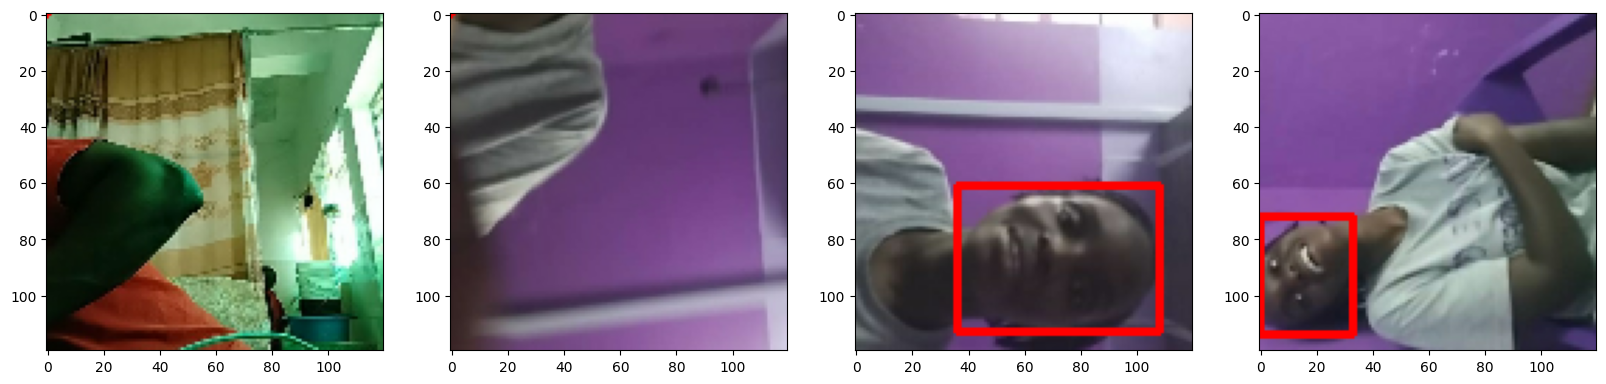

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

##Lets Build Deep Learning Model Using the functional API

First we will import Layers and Base Network

In [ ]:
# Install TensorFlow
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, ReLU
from tensorflow.keras.applications import VGG16

Downloading VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Build Instance of Network

In [ ]:
def build_model():
  #first we specify our input layer
  input_layer = Input(shape=(120,120,3))
  #pass the input layer through our vgg layer
  vgg = VGG16(include_top=False)(input_layer)

  #Classification Model
  f1 = GlobalMaxPooling2D()(vgg)
  class1 = Dense(2048, activation= 'relu')(f1)
  class2 = Dense(1, activation='sigmoid')(class1)

  #Bounding box model
  f2 = GlobalMaxPooling2D()(vgg)
  regress1 = Dense(2048, activation="relu")(f2)
  regress2 = Dense(4, activation="sigmoid")(regress1)

  facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
  return facetracker

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.724   , 0.      , 1.      , 0.2417  ],
        [0.571   , 0.      , 0.897   , 0.1824  ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.012794, 0.564   , 0.317   , 1.      ],
        [0.6064  , 0.574   , 0.924   , 0.9995  ],
        [0.7485  , 0.2686  , 1.      , 0.5728  ],
        [0.      , 0.0837  , 0.1294  , 0.509   ],
        [0.2195  , 0.3247  , 0.6357  , 0.63    ]], dtype=float16))

Lets Test out Neural Network

In [ ]:
facetracker = build_model()


In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
# X.shape()
print(X.shape)

(8, 120, 120, 3)


In [ ]:
# y.shape()
print(y[0].shape)

(8, 1)


In [ ]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
classes, coords

(array([[0.4402001 ],
        [0.5762431 ],
        [0.5447524 ],
        [0.3814695 ],
        [0.4697192 ],
        [0.56319666],
        [0.49519446],
        [0.48944262]], dtype=float32),
 array([[0.36566398, 0.2795007 , 0.48649454, 0.46699926],
        [0.44615903, 0.24666347, 0.30577385, 0.37064996],
        [0.41641563, 0.35510358, 0.3680687 , 0.3626036 ],
        [0.39732778, 0.28529912, 0.34219974, 0.4583178 ],
        [0.4845801 , 0.30225873, 0.41860908, 0.35068345],
        [0.4059332 , 0.28299165, 0.37029302, 0.40224952],
        [0.31461197, 0.23412906, 0.3227035 , 0.42669263],
        [0.4567662 , 0.33073542, 0.38902667, 0.34550464]], dtype=float32))

## Let's Define our losses and Optimizers

Defining Optimize and LR

In [ ]:
len(train)

1658

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/ batches_per_epoch

In [ ]:
lr_decay

0.00020104543626859667

In [ ]:

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [ ]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

Create Localization Loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):
  delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

  h_true = y_true[:,3] - y_true[:,1]
  w_true = y_true[:,2] - y_true[:,0]

  h_pred = yhat[:,3] - yhat[:,1]
  w_pred = yhat[:,2] - yhat[:,0]

  delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

  return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

Lets test out the Loss Metrics

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.6915479>

In [ ]:
classloss(y[0], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.89644873>

In [ ]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.6915479>

##Training  Our Neural Network
  First lets create Custom model Class

In [ ]:
class FaceTracker(Model):
  #Here is whre we pass our initial parameters
  def __init__(self, facetracker, **kwargs):
    super().__init__(**kwargs)
    self.model = facetracker
  #lets pass our optimizer ,classification Loss and Localization loss
  def compile(self, opt, classloss, localizationloss, **kwargs):
    super().compile(**kwargs)
    self.closs = classloss
    self.lloss = localizationloss
    self.opt = opt
  #This is gona take one batch of data the train on it
  def train_step(self, batch, **kwargs):

    X, y = batch

    with tf.GradientTape() as tape:
      #Make a prediction
      classes, coords = self.model(X, training=True)

      #calculate the loss
      batch_classloss = self.closs(y[0], classes)
      batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

      total_loss = batch_localizationloss+0.5*batch_classloss
      #calculate the gradients
      grad = tape.gradient(total_loss, self.model.trainable_variables)
    #Apply backprops and gradient decent againt all the different variables
    opt.apply_gradients(zip(grad, self.model.trainable_variables))
    #Lets return thos losses
    return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

  #This will be trigured whenever we pass through our validation dataset

  def test_step(self,batch, **kwargs):
    X, y = batch

    classes, coords = self.model(X, training=False)

    batch_classloss = self.closs(y[0], classes)
    batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
    total_loss = batch_localizationloss+0.5*batch_classloss

    return {"total_loss": total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

  def call(self, X, **kwargs):
    return self.model(X, **kwargs)


In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

Now Lets train

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=40, validation_data=val,
                 callbacks=[tensorboard_callback])

Epoch 1/40
1658/1658 [==============================] - 231s 116ms/step - total_loss: 0.4014 - class_loss: 0.0765 - regress_loss: 0.3632 - val_total_loss: 0.9260 - val_class_loss: 0.2737 - val_regress_loss: 0.7891
Epoch 2/40
1658/1658 [==============================] - 221s 113ms/step - total_loss: 0.1254 - class_loss: 0.0246 - regress_loss: 0.1131 - val_total_loss: 0.8118 - val_class_loss: 0.1072 - val_regress_loss: 0.7582
Epoch 3/40
1658/1658 [==============================] - 217s 111ms/step - total_loss: 0.0708 - class_loss: 0.0129 - regress_loss: 0.0643 - val_total_loss: 0.2873 - val_class_loss: 0.3980 - val_regress_loss: 0.0884
Epoch 4/40
1658/1658 [==============================] - 217s 111ms/step - total_loss: 0.0525 - class_loss: 0.0107 - regress_loss: 0.0471 - val_total_loss: 0.7965 - val_class_loss: 0.4526 - val_regress_loss: 0.5702
Epoch 5/40
1658/1658 [==============================] - 219s 111ms/step - total_loss: 0.0311 - class_loss: 0.0069 - regress_loss: 0.0277 - val_t

Plotting the Performance

In [ ]:
hist.history

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text(' Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label=' regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

##Making Predictions

Lets Make predictions on the Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat =  facetracker.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize(20,20))
for idx in range(4):
  sample_image = test_sample[0][idx]
  sample_coords = yhat[1][idx]

  if yhat[0][idx] > 0.9:
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255,0,0), 2)
    ax[idx].imshow(sample_image)

Lets now save our Model

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

Realtime Face Detection

In [ ]:
cap = cv2.VideoCapture(0)
#Here we are capturing our video frame  then we cut down to 450 by 450 pixels
while cap.isOpened():
  _ , frame = cap.read()
  frame = frame[50:500, 50:500, :]
#we convert it from BGR to RGB then we resize it to 120 pexels
  rgb = cv2.cvColor(frame, cv2.COLOR_BGR2RGB)
  resized = tf.image.resize(rgb, (120,120))
#Then we scale it down by diving by 255
  yhat = facetracker.predict(np.expand_dims(resized/255,0))
  sample_coords = yhat[1][0]

  if yhat[0] > 0.5:
    cv2.rectangle(frame,
                  tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                        [0,-30])),
                  tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                               [80,0])),
                       (255,0,0), -1)
    cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                             [0,-5])),
                cv2.FONT_HEESHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
  cv2.imshow('EyeTrack', frame)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.released()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Install OpenCV (if not already installed)
!pip install opencv-python-headless

# Assuming 'facetracker' is your TensorFlow model for face tracking
# Load the model here if necessary

# Capture video from webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam")
else:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()

        if ret:
            # Crop the frame to 450x450 pixels
            frame = frame[50:500, 50:500, :]

            # Convert BGR to RGB
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Resize to 120x120 pixels
            resized = tf.image.resize(rgb, (120, 120))

            # Scale down by dividing by 255
            resized_scaled = resized / 255.0

            # Perform prediction with your facetracker model
            yhat = facetracker.predict(np.expand_dims(resized_scaled, 0))
            sample_coords = yhat[1][0]

            # Draw rectangle and text if a face is detected
            if yhat[0] > 0.5:
                cv2.rectangle(frame,
                              tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -30])),
                              tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [80, 0])),
                              (255, 0, 0), -1)
                cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -5])),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Display the frame
            cv2.imshow('EyeTrack', frame)

            # Exit loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            print("Error: Failed to capture frame")
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
